# Лабораторная работа №1
## по дисциплине *Моделирование инженерных задач*
#Работу выполнил: студент гр. **М1О-418Бки-19** *Мустафа Эльтаеб*

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
DATA_URL="datasets/"

In [51]:
# winequality-white.csv is a ';' separated csv file.
white_wine=pd.read_csv(DATA_URL + "winequality-white.csv",sep=',')
df_white = white_wine
df_white['type']='white'
red_wine = pd.read_csv(DATA_URL + "winequality-red.csv",sep=',')
df_red = red_wine
df_red['type']='Red'

In [52]:
# Review Datasets
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red


In [53]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [54]:
red_wine.shape

(1599, 13)

In [55]:
white_wine.shape

(4898, 13)

In [56]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [57]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [58]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wine = pd.concat([red_wine, white_wine])   # concatenating horizontally since by default axis=0

# re-shuffle records just to randomize data points
wine = wine.sample(frac=1, random_state=42).reset_index(drop=True)

### Understand dataset features and values

In [59]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,Red,NaN
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [60]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   object  
 13  quality_label         4898 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [61]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525473,115.744728,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749313,56.521751,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# data Analysis and Visualizations


In [62]:
sorted(wine['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

#### Barplot is chosen since the wine quality is limited to certain values. Despite being similar to continuous data, it's more more similar to categorical ones. Using barplot can give us a better overview with the distribution. Other data is being plot as distplot.

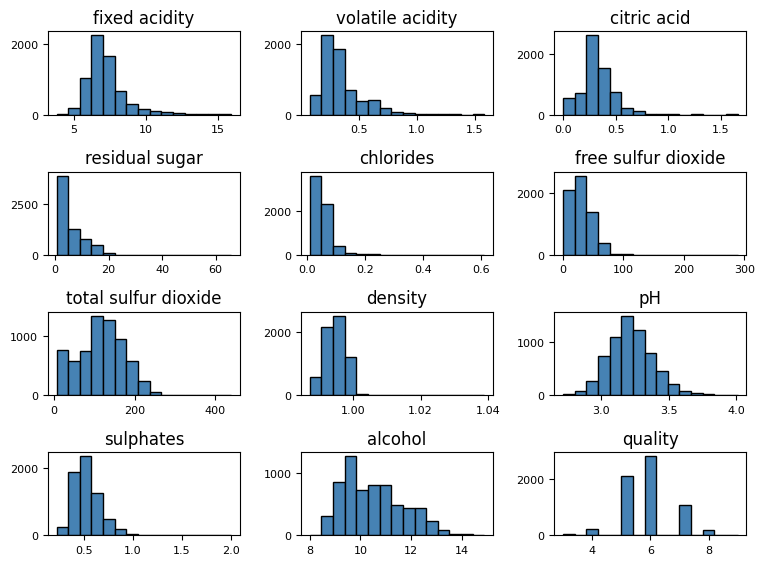

In [63]:
wine.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)

# command to give space b/t diff. plots 
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

In [64]:

count_cat = wine.nunique() # it shows us how much unique examples we have in each feature

In [65]:
count_cat

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     133
total sulfur dioxide    275
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
quality_label             3
dtype: int64

In [66]:
wine['type'].value_counts() 

white    4898
Red      1599
Name: type, dtype: int64

In [67]:
# The distribution of the examples in our dataset
wine['type'].value_counts("white")*100 # in %
wine['type'].value_counts("red")*100 # in %

white    75.388641
Red      24.611359
Name: type, dtype: float64

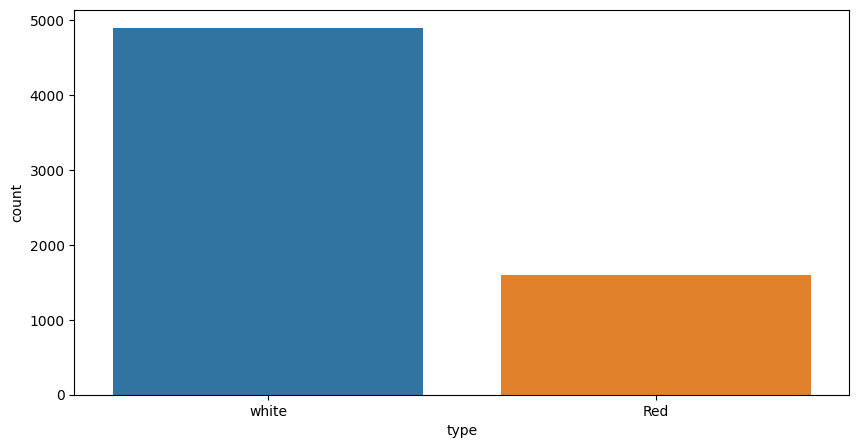

In [68]:
plt.figure(figsize = (10,5))
sns.countplot(x = wine['type']); # we will plot it for better illustration

It seems that we have much more white wine than red wine. It will be usefull for our dummy classifier.


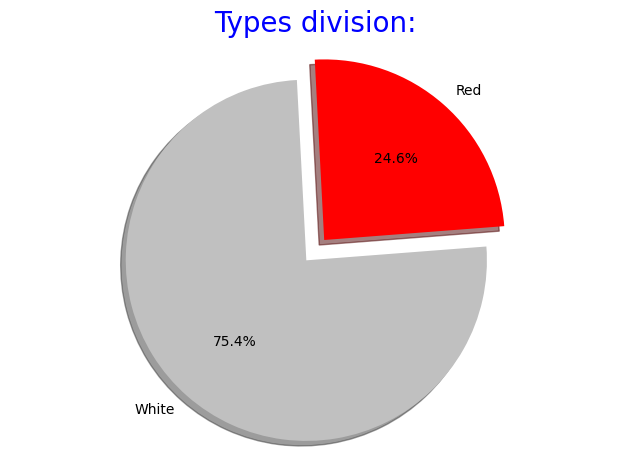

In [69]:
# Pie chart
labels = ['White', 'Red'] # every label represnts a type
pie_x = 0.753886 # the distribution
pie_y = 0.246114 # the distribution
sizes = [pie_x,pie_y] # we have two types and their distribution
explode = (0, 0.15) # the distance between the pic slicers
col_pie = ["silver","red"] # for the colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=col_pie, autopct='%1.1f%%',
        shadow=True, startangle=93)
# equal aspect ratio ensures that pie is drawn as a circle
plt.title("Types division:", size=20, color="blue")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

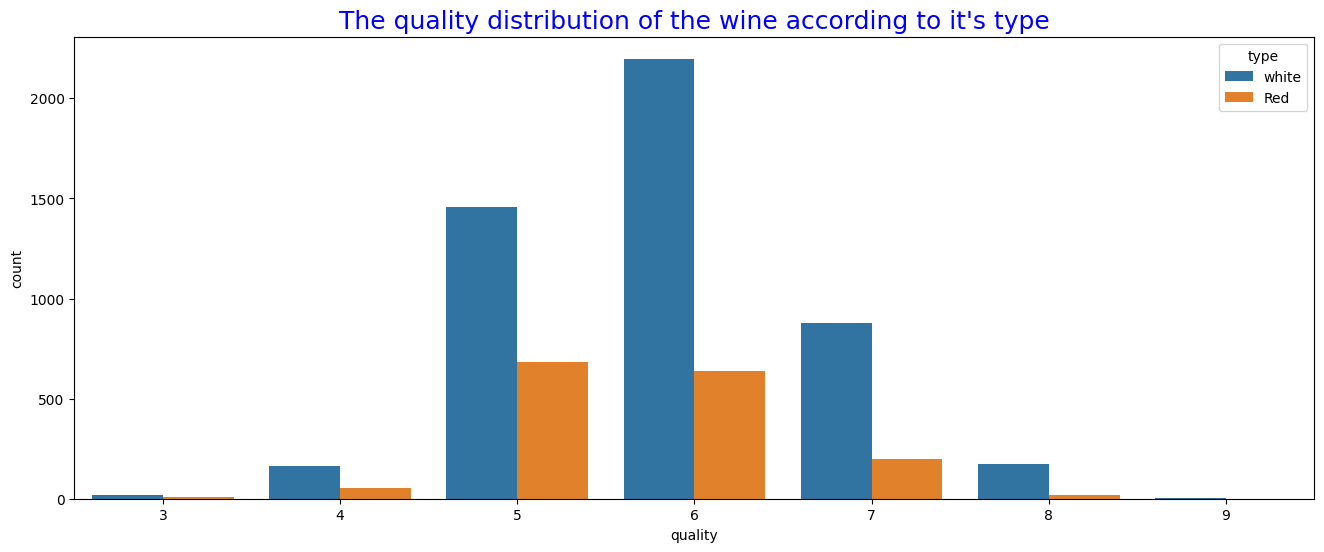

In [70]:
# another plot to show us more intersting details about the dataset
plt.figure(figsize = (16,6))
plt.title("The quality distribution of the wine according to it's type", size=18, color='b')
sns.countplot(x=wine['quality'], hue = wine['type']);

We can see that we have some quality for each wine. Let's take a look on it:

In [71]:
wine["quality"].value_counts() # the amount of wine we have from each quality number

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Let's try something else, we will groupby the wine into type groups to see which one has a greater quality:

In [72]:
df_types = wine.groupby('type') #by type
df_types

In [73]:
df_types.quality.mean() # the mean of the quality for each type

type
Red      5.636023
white    5.877909
Name: quality, dtype: float64

As we can see, the white wine that we have in the dataset, has a little bit better quality than the red wine.

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
wine['type'] = encoder.fit_transform(wine['type'])
# red = 0
# white = 1

In [75]:
wine["type"].value_counts()


1    4898
0    1599
Name: type, dtype: int64

In [76]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,1,high
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,0,NaN
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,1,medium
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,1,medium
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,1,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,1,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,1,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,1,low


C:\Users\nicky\AppData\Local\Temp\ipykernel_18028\3117237203.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(), square=True, annot=True, cmap="Greens");


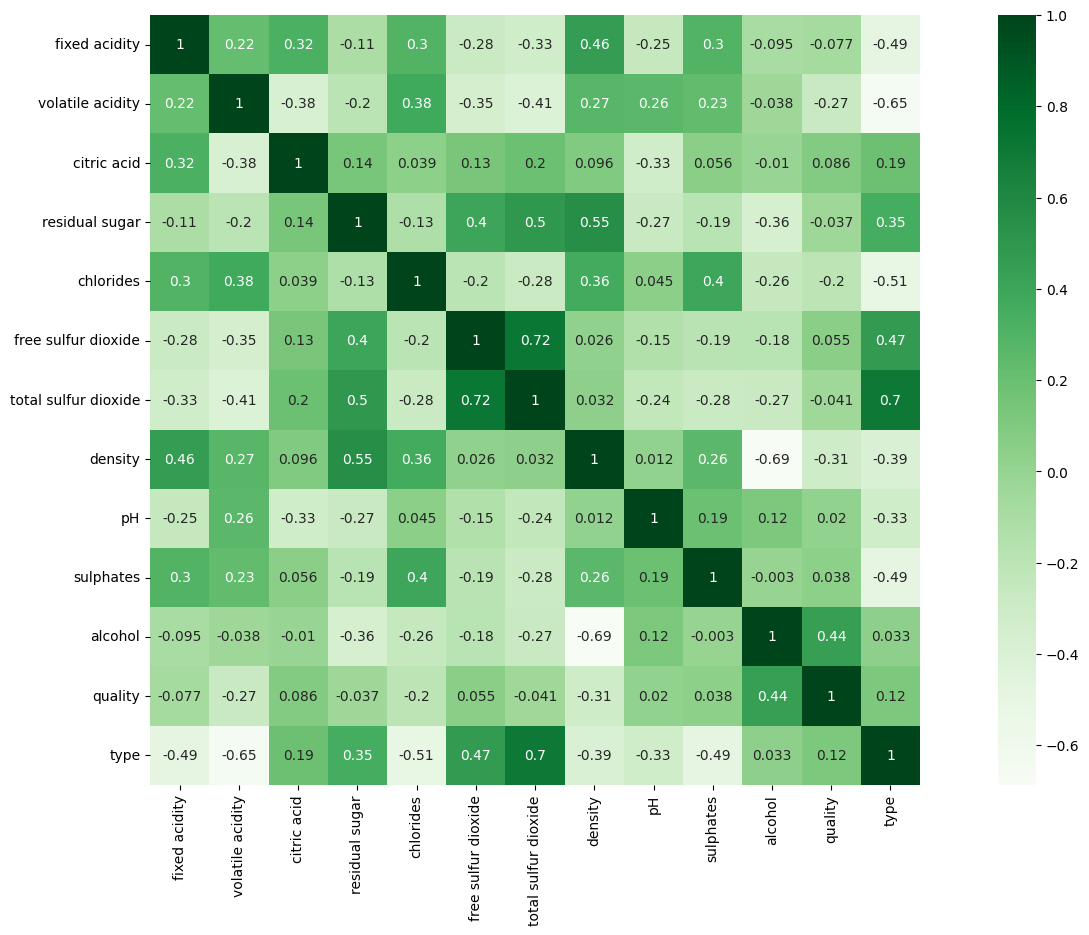

In [77]:
#I want to know the correalation between each feature
plt.figure(figsize=(20, 10))
sns.heatmap(wine.corr(), square=True, annot=True, cmap="Greens");


Heatmap is a super important tool, because it tells us the bigger story. As we can see, total sulfur dioxide has a huge effect on the type of the wine (0.7 of correalation). free sulfur dioxide takes the 2nd place with 0.47 of correalation. After it, the residual sugar with 0.35 of correalation. Another intersting thing is the fact that the quality of the wine has a connection to the type of the wine. It will be intresting to find out which one of the types has the higher quality.

We would like to see the impact of total sulfur dioxide, free sulfur dioxide and residual sugar on the wine's type. Let's go back to the graphs.

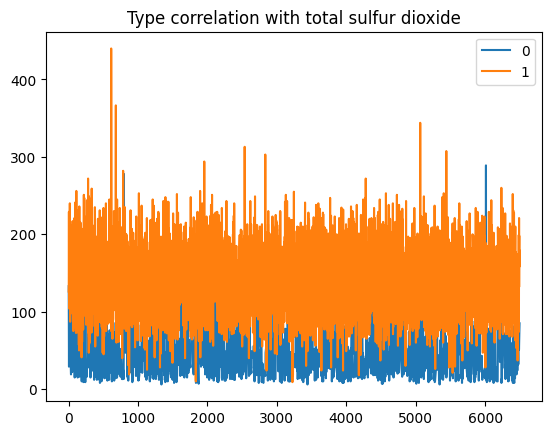

In [78]:
wine.groupby('type')['total sulfur dioxide'].plot(title="Type correlation with total sulfur dioxide", legend=True);
# the most important thing here is to watch the difference between the red and white wine
# we can also see that there are a few outliers 

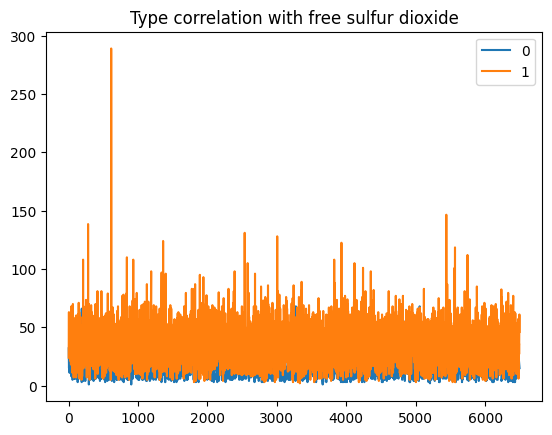

In [79]:
wine.groupby('type')['free sulfur dioxide'].plot(title="Type correlation with free sulfur dioxide", legend=True);

In [80]:
wine.describe() # more info about our dataset before the models part

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525473,115.744728,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749313,56.521751,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Scaling

In [81]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wine
df[features] = ss.fit_transform(df[features])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367675,0.181453,-0.165631,0.258120,-1.016626,1.432308,2.498456,1,high
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083082,0.305309,0.301278,0.320319,-0.546178,-0.496219,-0.937230,0,NaN
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421149,0.305309,-0.859324,-0.239471,-0.613385,1.264610,1.353228,1,medium


In [82]:
#df['type']=df['type'].map({'red':0,'white':1})
#df

In [83]:
target=df['type'] # the feature we would like to predict, the type of the wine
data=df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0) #train\test split

The default split is 75% train , 25% test.

### Split Test/ Train

In [84]:
target=df['type'] # the feature we would like to predict, the type of the wine
data=df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0) #train\test split

In [85]:
X_train.shape # 3990 rows, 12 columns

(4872, 13)

In [86]:
X_test.shape # 1330 rows, 12 columns

(1625, 13)

In [87]:
y_train.shape # 3990 rows, one column

(4872,)

In [88]:
y_test.shape # 1330 rows, one columns

(1625,)

In [89]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label'],
      dtype='object')

In [90]:
# Split the output into a seperate set. 
X_new=df[['alcohol', 'density', 'volatile acidity', 'chlorides']]
Y_new=df[['quality']]

In [91]:
# Split the data into train and test set with 80:20 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=40)

In [92]:
# Preview the split dataset
X_train.head()

,alcohol,density,volatile acidity,chlorides
908,-0.328521,1.268447,4.163031,0.684143
3131,-1.502407,-0.365735,-0.909139,1.883084
2585,-0.999313,0.434681,0.366496,-0.086605
3375,-0.076974,-0.899345,-0.787650,-0.571891
4444,0.258422,1.135045,0.609474,0.198857


In [93]:
Y_train.head()

,quality
908,-0.937230
3131,0.207999
2585,-0.937230
3375,-0.937230
4444,0.207999


In [94]:
X_test

,alcohol,density,volatile acidity,chlorides
369,-0.999313,0.634785,-0.605417,-0.257883
6243,1.096912,0.774858,0.427241,0.427227
3374,-0.663917,0.768188,0.184263,-0.400614
1009,0.509969,0.161206,0.791708,0.056126
220,1.180761,0.001123,0.062773,0.341588
...,...,...,...,...
1757,0.509969,-0.198981,-0.666161,-0.200790
5699,-1.167011,0.901590,2.128088,0.541412
3875,0.426120,-0.218992,-0.848395,-0.686076
5584,0.006875,-0.632540,-0.423183,-0.885900


In [95]:
y_test

5316    1
5210    1
3518    1
1622    1
2443    0
       ..
2152    1
4019    0
3732    1
1315    0
5701    1
Name: type, Length: 1625, dtype: int32

# Comments
As the data has been processed, we realise that the data need further study with different algorithm for better understing and accuracy